# Goal
Predict the major programming language used for each GitHub repository using the content of readme files.

# Project Plan

1. Acquire: Collect GitHub readme files with webscraping methods.
> collect at least 100 repo
>
> python built in 'request', selenium, beautifulsoup

2. Prepare: clean and process data
> normalization (lower-case, remove any non-alpha or whitespace, etc)
>
> further process: tokenization, lemmatization, stemming, removal of stopwords

3. Explore (overall word frequency, frequent word for specific language, etc)

4. Model - classification

5. Deliver: jupyter notebook report & powerpoint presentation

# Data Dictionary

| Column Name 	| Description                                             	|
|-------------	|---------------------------------------------------------	|
| label       	| the major programming language used for each repository 	|
| cleaned     	| processed readme content, ready for analysis            	|

# Import - Package & Data

In [3]:
import unicodedata
import re
import json

import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

# import module for data preparation
import prepare

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [4]:
# bring in the pre-saved GitHub webscrape data 
df = pd.read_csv('GitHub_data.csv')
df.head()

,Unnamed: 0,index,language,link,readme
0,0,0.0,JavaScript,freeCodeCamp/freeCodeCamp,['GitHub is home to over 40 million developers...
1,1,1.0,Rust,996icu/996.ICU,['GitHub is home to over 40 million developers...
2,2,2.0,JavaScript,vuejs/vue,['GitHub is home to over 40 million developers...
3,3,3.0,JavaScript,facebook/react,['GitHub is home to over 40 million developers...
4,4,4.0,C++,tensorflow/tensorflow,['GitHub is home to over 40 million developers...


In [67]:
# peek data shape
df.shape

(406, 5)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
Unnamed: 0    406 non-null int64
index         295 non-null float64
language      406 non-null object
link          406 non-null object
readme        406 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 15.9+ KB


# Data preparation

In [5]:
# prepare data
# change col name
# normalize, stem, lemma, remove stopwords
df = prepare.prep_target(df, 'target')

In [5]:
# peek the cleaned dataframe containing result from each step
df.head()

,label,target,original,normalized,stemmed,lemmatized,cleaned
0,JavaScript,"['', '', '\n\n\n', 'freeCodeCamp.org is a frie...","['', '', '\n\n\n', 'freeCodeCamp.org is a frie...",freecodecamp org friendly community where yo...,freecodecamp org friendli commun where you can...,freecodecamp org friendly community where you ...,freecodecamp org friendly community learn code...
1,Rust,"['', 'Please note that there exists NO other o...","['', 'Please note that there exists NO other o...",please note that there exists other official ...,pleas note that there exist other offici accou...,please note that there exists other official a...,please note exists official account app mercha...
2,JavaScript,"['', '', '\n\n\n\n\n\n\n\n\n', ""Vue.js is an M...","['', '', '\n\n\n\n\n\n\n\n\n', ""Vue.js is an M...",vue mit licensed open source project in...,vue mit licens open sourc project independ pro...,vue mit licensed open source project independe...,vue mit licensed open source project independe...
3,JavaScript,"['', 'React is a JavaScript library for buildi...","['', 'React is a JavaScript library for buildi...",react javascript library for building user i...,react javascript librari for build user interf...,react javascript library for building user int...,react javascript library building user interfa...
4,C++,"['', 'TensorFlow is an end-to-end open source ...","['', 'TensorFlow is an end-to-end open source ...",tensorflow end end open source platform nfo...,tensorflow end end open sourc platform nfor ma...,tensorflow end end open source platform nfor m...,tensorflow end end open source platform nfor m...


In [6]:
# seubset the data for following analysis
df = df[['label', 'cleaned']]

# Exploration

<div class="alert alert-block alert-warning">
<b>Takeaway</b>

- Most of the repo collected used JavaScript as the major language

- React is the most frequent word appeared in the repo using JavaScript as the major programing language.  
> React is also a JavaScript library for building user interfaces.

- Python is the the most frequent word appeared in the repo using Python as the major programing language
    
</div>

In [7]:
pd.concat(
[df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

,n,percent
JavaScript,136,0.334975
Python,56,0.137931
Java,32,0.078818
C++,26,0.064039
Go,24,0.059113
TypeScript,16,0.039409
HTML,13,0.032020
Shell,12,0.029557
Ruby,11,0.027094
Objective-C,9,0.022167


In [32]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens"] = df["cleaned"].apply(tokenizer.tokenize)
df.head()

,label,cleaned,tokens
0,JavaScript,freecodecamp org friendly community learn code...,"[freecodecamp, org, friendly, community, learn..."
1,Rust,please note exists official account app mercha...,"[please, note, exists, official, account, app,..."
2,JavaScript,vue mit licensed open source project independe...,"[vue, mit, licensed, open, source, project, in..."
3,JavaScript,react javascript library building user interfa...,"[react, javascript, library, building, user, i..."
4,C++,tensorflow end end open source platform nfor m...,"[tensorflow, end, end, open, source, platform,..."


In [47]:
all_words = [word for tokens in df["tokens"] for word in tokens]

In [48]:
sentence_lengths = [len(tokens) for tokens in df["tokens"]]

In [49]:
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

148006 words total, with a vocabulary size of 12383
Max sentence length is 10595


**Note:** very skewed: short sentences, and a lot of sentences

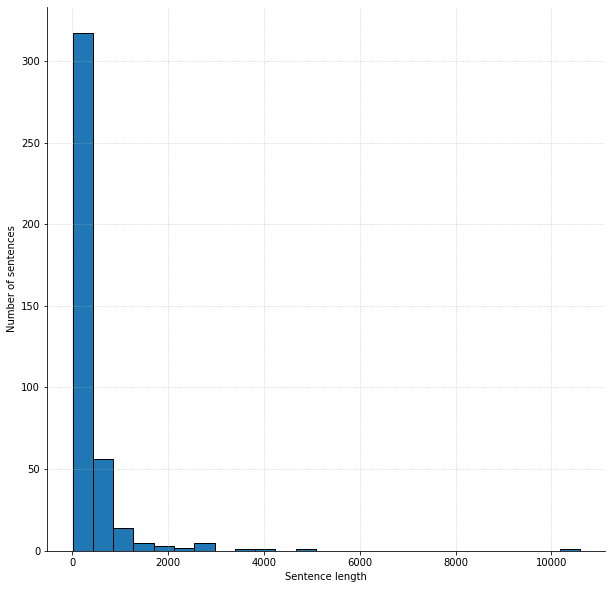

In [12]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Text(0.5, 1.0, 'Most frequently used programing languages')

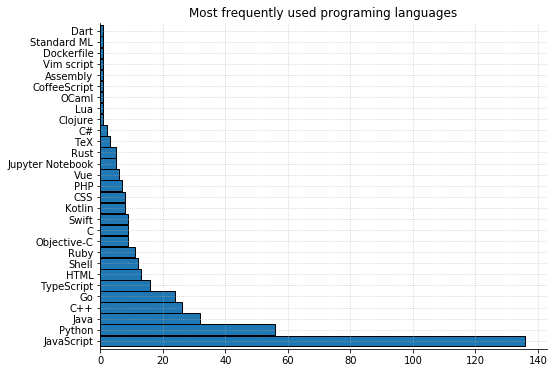

In [13]:
df.label.value_counts().plot.barh(figsize=(8, 6),width = .95)
plt.title('Most frequently used programing languages')

<div class="alert alert-block alert-warning">
<b>Takeaway - word frequency </b>
- Frequency of individual words or 5 consecutive words are not very informative toward any specific programming language

</div>

In [38]:
def clean(text):
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [39]:
prep_df_cleaned = " ".join(df.cleaned)
explore_df_cleaned = clean(prep_df_cleaned)

Text(0.5, 1.0, '20 most common words in GitHub Readme.md')

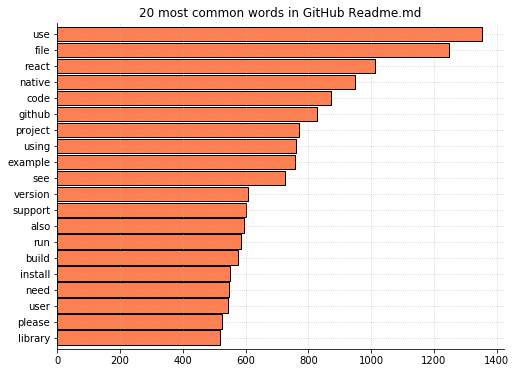

In [40]:
pd.Series(explore_df_cleaned).value_counts().sort_values().tail(20).plot.barh(figsize=(8, 6),width=.9, color = 'coral')
plt.title('20 most common words in GitHub Readme.md')

Text(0.5, 1.0, 'Most frequently seen word combinations in Github Readme.md')

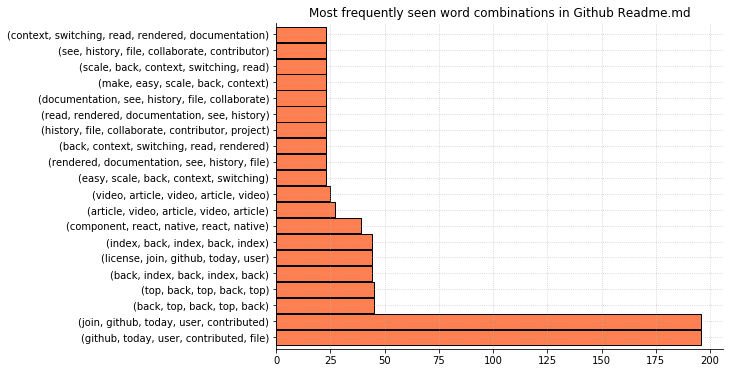

In [17]:
pd.Series(nltk.ngrams(explore_df_cleaned, 5)).value_counts().head(20).plot.barh(figsize=(8, 6), width=.95, color='coral')
plt.title('Most frequently seen word combinations in Github Readme.md')

**Note** Programming language do not appear in readme documents.

In [64]:
print(f"The number of Javascript in dataset: {df[df.cleaned.str.contains('javaScript')]}")
print(f"The number of Python in dataset: {df[df.cleaned.str.contains('python')]}")

The number of Javascript in dataset: Empty DataFrame
Columns: [label, cleaned]
Index: []
The number of Python in dataset:           label                                            cleaned
22       Python  english portugues brasil deutsch italiano pols...
23       Python  curated list awesome python framework library ...
31       Python  implementation learning purpose may le efficie...
37       Python  youtube download video youtube com video platf...
53       Python  fuck magnificent app inspired liamosaur ntweet...
65       Python  kera high level neural network api written pyt...
80       Python  curated list awesome machine learning framewor...
90       Python  nthis software ha designed much joy nby kennet...
105  JavaScript  based true nstory xxx build engineer ha left a...
112  JavaScript  based true nstory xxx build engineer ha left a...
130      Python  big list naughty string evolving list string h...
131  JavaScript  todo demo provide excellent cursory glance fra...
150  Ja

**Question** Is there any particular wording or sentiment with particular language?


<div class="alert alert-block alert-warning">
<b>Some particular wording or sentiment with particular language was observed </b>
    
- React & native is the most commonly used word in project involving JavaScrip
    
- React is a JavaScript library for building user interfaces, which might be a clue for our model predictions
</div>

In [41]:
javascrip_slice = df.copy().drop(columns = 'tokens')
javascrip_slice = javascrip_slice[javascrip_slice.label == 'JavaScript']
prep_java_cleaned = " ".join(javascrip_slice.cleaned)
explore_java_cleaned = clean(prep_java_cleaned)

Text(0.5, 1.0, '20 most common words in GitHub Readme.md using JavaScript as the major language')

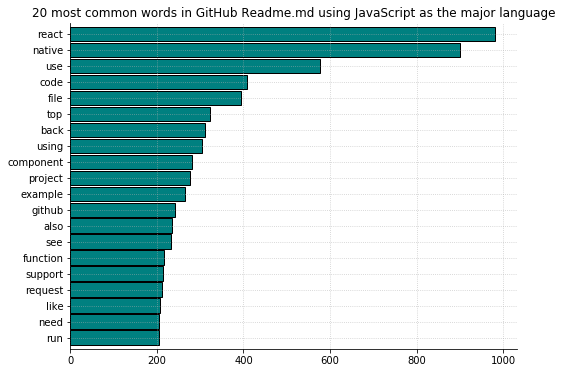

In [21]:
# teal for JavaScript
pd.Series(explore_java_cleaned).value_counts().sort_values().tail(20).plot.barh(figsize=(8, 6),width=.9, color = 'teal')
plt.title('20 most common words in GitHub Readme.md using JavaScript as the major language')

(-0.5, 2399.5, 1599.5, -0.5)

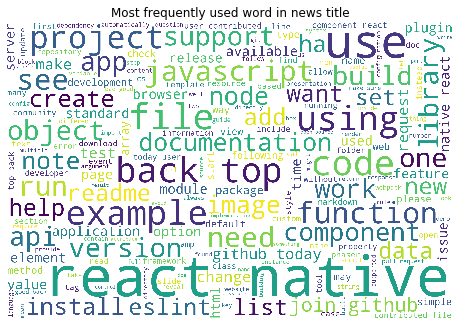

In [43]:
from wordcloud import WordCloud 

# wordcloud create image object
# random_state fix the color so it won't change everytime we rerun the code
plt.figure(figsize=(8,6))
# input for wordcloud = full content in string
img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(prep_java_cleaned)

# if no plt.imshow(img), the image won't showup
plt.imshow(img)
plt.title('Most frequently used word in news title')

# if no axis("off"), there will be auto created gridline underneath the cloud
plt.axis("off")

<div class="alert alert-block alert-warning">
<b>Some particular wording or sentiment with particular language was observed </b>
    
- Found freqeunt word **python** (instead of **P**ython) & file in our variable, which will assit the model prediction!
</div>

In [44]:
python_slice = df.copy().drop(columns = 'tokens')
python_slice = python_slice[python_slice.label == 'Python']
prep_python_cleaned = " ".join(python_slice.cleaned)
explore_python_cleaned = clean(prep_python_cleaned)

Text(0.5, 1.0, '20 most common words in GitHub Readme.md using Python as the major language')

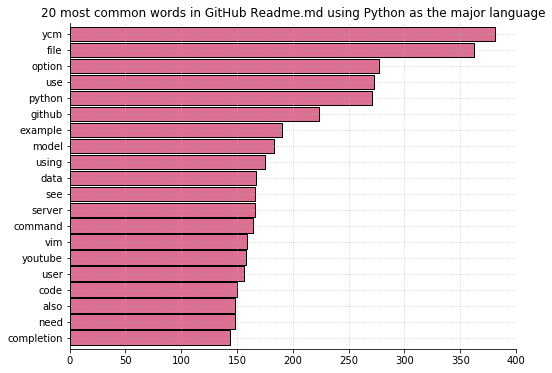

In [23]:
# palevioletred for Python
pd.Series(explore_python_cleaned).value_counts().sort_values().tail(20).plot.barh(figsize=(8, 6),width=.9, color = 'palevioletred')
plt.title('20 most common words in GitHub Readme.md using Python as the major language')

(-0.5, 1199.5, 799.5, -0.5)

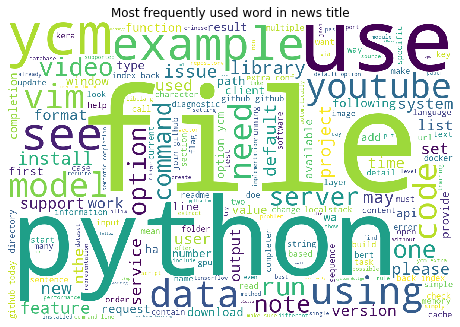

In [45]:
plt.figure(figsize=(8,6))

img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(prep_python_cleaned)

# if no plt.imshow(img), the image won't showup
plt.imshow(img)
plt.title('Most frequently used word in news title')

# if no axis("off"), there will be auto created gridline underneath the cloud
plt.axis("off")

# Model
<div class="alert alert-block alert-warning">
    
Multiple modeling methods were utilized and here we document the 3 best performing models

- Feature extraction with TF-IDF (term frequency-inverse document frequency) or TF 
- Logistic regression - begin with the simplest model
- KNN
- Decision tree classifier

**Conclusion**
- Due to the larger sample size, the prediction for JavaScript was always the easiest regardless of the ML algorithm choice.

- KNN best predicted Python.

- Decision tree, although presented some overfitting, but was an overall more well rounded prediction model across the prediction of all three languages.
</div>

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
#from pandas_ml import ConfusionMatrix

#import wget
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

random_state = 123
df = df[['label','cleaned']]
df = df.groupby('label').filter(lambda x : len(x)>30)

In [6]:
df.label.value_counts()

JavaScript    136
Python         56
Java           32
Name: label, dtype: int64

## Feature Extraction with TF-IDF

In [7]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.cleaned)
y = df.label

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [9]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

### Logistic regression

In [10]:
lm = LogisticRegression(solver = 'liblinear', C = 0.5).fit(X_train, y_train)

In [11]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [12]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix for the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 63.69%
---
Confusion Matrix for the train set


actual,Java,JavaScript,Python
predicted,,,
JavaScript,22,101,32
Python,3,8,13


In [61]:
report =classification_report(train.predicted, train.actual, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix for the train set')
r.round(2)

Confusion Matrix for the train set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.0,0.76,0.33,0.63,0.37,0.71
precision,0.0,0.94,0.24,0.63,0.39,0.85
recall,0.0,0.65,0.52,0.63,0.39,0.63
support,0.0,158.00,21.00,0.63,179.00,179.00


In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix for the test set')
pd.crosstab(test.predicted, test.actual)

Accuracy: 60.00%
---
Confusion Matrix for the test set


actual,Java,JavaScript,Python
predicted,,,
JavaScript,6,23,7
Python,1,4,4


In [62]:
report =classification_report(test.actual, test.predicted, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix for the test set')
r.round(2)

Confusion Matrix for the test set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.0,0.73,0.40,0.6,0.38,0.54
precision,0.0,0.64,0.44,0.6,0.36,0.49
recall,0.0,0.85,0.36,0.6,0.41,0.60
support,7.0,27.00,11.00,0.6,45.00,45.00


In [49]:
import warnings

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l2','elasticnet','none'], 
                     'C': [1, 10, 100, 1000],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        lm, tuned_parameters, scoring='%s_macro' % score
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}

Grid scores on development set:

0.448 (+/-0.365) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.448 (+/-0.365) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.380 (+/-0.199) for {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.448 (+/-0.365) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.516 (+/-0.481) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
0.808 (+/-0.062) for {'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}
0.825 (+/-0.074) for {'C': 1, 'penalty': 'none', 'solver': 'lbfgs'}
n

In [39]:
lm = LogisticRegression(C = 10, penalty = 'none', solver = 'saga').fit(X_train, y_train)

/Users/lonilanistea/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1503: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/lonilanistea/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [40]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix for the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 93.85%
---
Confusion Matrix for the train set


actual,Java,JavaScript,Python
predicted,,,
Java,22,0,0
JavaScript,0,101,0
Python,3,8,45


In [41]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

Accuracy: 75.56%


In [53]:
lm = LogisticRegression(C = 1, penalty = 'none', solver = 'lbfgs').fit(X_train, y_train)

In [54]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [55]:
# train['predicted'] = lm.predict(X_train)
# test['predicted'] = lm.predict(X_test)
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix for the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 93.85%
---
Confusion Matrix for the train set


actual,Java,JavaScript,Python
predicted,,,
Java,22,0,0
JavaScript,0,101,0
Python,3,8,45


In [46]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

Accuracy: 77.78%


In [56]:
lm = LogisticRegression(C = 1000, penalty = 'l2', solver = 'saga').fit(X_train, y_train)

/Users/lonilanistea/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [57]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [58]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix for the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 93.85%
---
Confusion Matrix for the train set


actual,Java,JavaScript,Python
predicted,,,
Java,22,0,0
JavaScript,0,101,0
Python,3,8,45


In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

Accuracy: 77.78%


### KNearest Neighbor Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.85
Accuracy of KNN classifier on test set: 0.78


In [68]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#k = knn.fit(X_train, y_train)

In [69]:
train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

In [70]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix of the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 84.92%
---
Confusion Matrix of the train set


actual,Java,JavaScript,Python
predicted,,,
Java,19,1,0
JavaScript,3,100,12
Python,3,8,33


In [71]:
report =classification_report(train.actual, train.predicted, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix of the train set')
r.round(2)

Confusion Matrix of the train set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.84,0.89,0.74,0.85,0.83,0.85
precision,0.95,0.87,0.75,0.85,0.86,0.85
recall,0.76,0.92,0.73,0.85,0.80,0.85
support,25.00,109.00,45.00,0.85,179.00,179.00


In [72]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix of the test set')
pd.crosstab(test.predicted, test.actual)

Accuracy: 77.78%
---
Confusion Matrix of the test set


actual,Java,JavaScript,Python
predicted,,,
Java,4,0,0
JavaScript,2,24,4
Python,1,3,7


In [73]:
report =classification_report(test.actual, test.predicted, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix of the test set')
r.round(2)

Confusion Matrix of the test set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.73,0.84,0.64,0.78,0.74,0.77
precision,1.00,0.80,0.64,0.78,0.81,0.79
recall,0.57,0.89,0.64,0.78,0.70,0.78
support,7.00,27.00,11.00,0.78,45.00,45.00


In [67]:
import warnings

# Set the parameters by cross-validation
tuned_parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'n_neighbors': [1, 3, 5, 7, 9],
                   'weights': ['uniform', 'distance'],
                   'leaf_size': [1, 3, 5, 7, 9]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        knn, tuned_parameters, scoring='%s_macro' % score
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}

Grid scores on development set:

0.737 (+/-0.133) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
0.737 (+/-0.133) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}
0.785 (+/-0.083) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}
0.796 (+/-0.069) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}
0.792 (+/-0.230) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}
0.778 (+/-0.228) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
0.814 (+/-0.260) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}
0.813 (+/-0.265) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'distance'}
0.81

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}

Grid scores on development set:

0.639 (+/-0.140) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
0.639 (+/-0.140) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'distance'}
0.689 (+/-0.096) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}
0.660 (+/-0.129) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}
0.730 (+/-0.171) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}
0.687 (+/-0.208) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
0.727 (+/-0.149) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'uniform'}
0.714 (+/-0.196) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7, 'weights': 'distance'}
0.740 (+/-0.133) for {'algorithm': 'auto', 'l

In [76]:
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.83
Accuracy of KNN classifier on test set: 0.76


In [77]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

k = knn.fit(X_train, y_train)
train['predicted'] = k.predict(X_train)
test['predicted'] = k.predict(X_test)

In [78]:
# train['predicted'] = lm.predict(X_train)
# test['predicted'] = lm.predict(X_test)
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix for the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 83.24%
---
Confusion Matrix for the train set


actual,Java,JavaScript,Python
predicted,,,
Java,17,0,0
JavaScript,5,100,13
Python,3,9,32


### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 7, random_state=123)

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [32]:
y_pred = clf.predict(X_train)
print('Accuracy of Decision tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision tree classifier on training set: 0.87
Accuracy of Decision tree classifier on test set: 0.71


In [34]:
train['predicted'] = clf.predict(X_train)
test['predicted'] = clf.predict(X_test)

In [35]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix of the train set')
pd.crosstab(train.predicted, train.actual)

Accuracy: 87.15%
---
Confusion Matrix of the train set


actual,Java,JavaScript,Python
predicted,,,
Java,18,1,0
JavaScript,4,101,8
Python,3,7,37


In [36]:
report =classification_report(train.actual, train.predicted, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix of the train set')
r.round(2)

Confusion Matrix of the train set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.82,0.91,0.80,0.87,0.84,0.87
precision,0.95,0.89,0.79,0.87,0.88,0.87
recall,0.72,0.93,0.82,0.87,0.82,0.87
support,25.00,109.00,45.00,0.87,179.00,179.00


In [37]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix of the test set')
pd.crosstab(test.predicted, test.actual)

Accuracy: 71.11%
---
Confusion Matrix of the test set


actual,Java,JavaScript,Python
predicted,,,
Java,3,0,0
JavaScript,3,21,3
Python,1,6,8


In [38]:
report =classification_report(test.actual, test.predicted, output_dict=True)
r = pd.DataFrame(report)
print('Confusion Matrix of the test set')
r.round(2)

Confusion Matrix of the test set


,Java,JavaScript,Python,accuracy,macro avg,weighted avg
f1-score,0.60,0.78,0.62,0.71,0.66,0.71
precision,1.00,0.78,0.53,0.71,0.77,0.75
recall,0.43,0.78,0.73,0.71,0.64,0.71
support,7.00,27.00,11.00,0.71,45.00,45.00


**Compared with a single most frequent word**

In [26]:
print(f"Total number of repo used JavaScript as the major language: {len(df[df.label == 'JavaScript'])}")
print("---")
print("Count of each programing language versus the total number of readme files containg the word 'react'")
print(f"{df[df.cleaned.str.contains('react')].label.value_counts()}")
print("---")
print("True ration: {:.2f}".format(29/ len(df[df.label == 'JavaScript'])))

Total number of repo used JavaScript as the major language: 136
---
Count of each programing language versus the total number of readme files containg the word 'react'
JavaScript    29
Java           3
Name: label, dtype: int64
---
True ration: 0.21


In [30]:
print(f"Total number of repo used Python as the major language: {len(df[df.label == 'Python'])}")
print("---")
print("Count of each programing language versus the total number of readme files containg the word 'python'")
print(f"{df[df.cleaned.str.contains('python')].label.value_counts()}")
print("---")
print("True ration: {:.2f}".format(31/ len(df[df.label == 'Python'])))

Total number of repo used Python as the major language: 56
---
Count of each programing language versus the total number of readme files containg the word 'python'
Python        31
JavaScript     6
Java           1
Name: label, dtype: int64
---
True ration: 0.55
